# **An Intuitive Data Clearning Process with Python**

by **Okeke Stephen**

Data cleaning is a critical part of the data science pipeline because the insights and results produced with a data is a reflection of the nature and quality of the data used in the work. In this article, I will share the most commonly performed data cleaning tasks by Data Scientists. For a data to be considered clean, it must have these qualities: complete, correct, accurate and relevant. In this article, three important data clearning tasks like missing data,  irrelevant features or inconsistent data and outliers handling will be focussed on.

In [1]:
# Importing relevant  libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Loading
In this task, I will use the New York Airbnb 2019 data to demonstrate the data cleaning practices.

In [2]:
# Load data with panda dataframe
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
#Make a copy of the of the original data for future comparative purposes
airbnb_copy = airbnb_df.copy()

# Perform Basic Exploratory Data Analysis (EDA)

In [4]:
# Simple exploratory data analysis
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Learn about the data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [31]:
#Obtaining the statistics of the data
airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48892.0,6.762310e+07,7.861223e+07,2438.00000,7.822844e+06,3.079553e+07,1.074344e+08,2.743213e+08
lat,48892.0,4.072895e+01,5.452924e-02,40.49979,4.069010e+01,4.072308e+01,4.076311e+01,4.091306e+01
long,48892.0,-7.395217e+01,4.615727e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48892.0,1.527140e+02,2.401561e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48892.0,7.030312e+00,2.051113e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48892.0,2.327583e+01,4.455161e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48892.0,1.090974e+00,1.597310e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48892.0,7.144359e+00,3.295349e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48892.0,1.127864e+02,1.316243e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [7]:
# Splitting the data features into numerical and categorical classes for future use
airbnb_cat_df = airbnb_df.select_dtypes(include=['object'])
airbnb_num_df = airbnb_df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(airbnb_cat_df, airbnb_num_df)

Non-Numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

Numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


# Handling Missing Data
Missing data is prevalent in different types of data and it is quite problematic dealing with missing values. Many machine learning algorithms cannot process missing values and thus need to be dealt with before passing the data to the adopted algorithm. 

Two typical methods used in handling missing values are:
-- dropping the rows or columns(critical information that maybe useful in prediction could be lost)
-- values imputation based on observations i.e. the mean or median( bias could be introduced into the data but it is better that removing useful values)

Proper dealing with missing values depend on context of the task at hand and it is recommended to try different approches and adopted the best effective method.  

In [8]:
#The df.isnull().sum() function visualize columns with missing values (print columns with missing values and rate)
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(airbnb_df)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


In [9]:
#The mean() is used to know the percentage of missing values in each column (helpful to decide whether to drop a column or not)
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(airbnb_df)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


In [10]:
#heatmap() helps to visualize missing values (helpful to know the point in which the missing values exist)

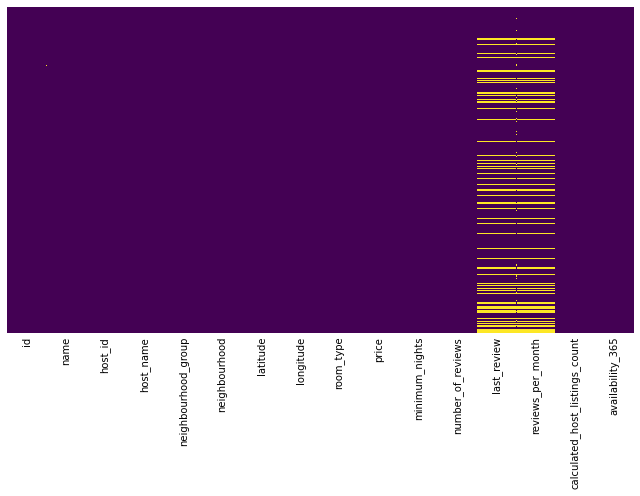

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb_df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [12]:
#Drop irrelevant columns using drop() function
#Axis = 1 because we want to drop columns, Axis = 0 when we want to dro rows, inplace = True because transformation is done directly on the dataset
columnsToDrop = ['id','host_name','last_review']
airbnb_df.drop(columnsToDrop, axis=1, inplace=True)
missing_cols(airbnb_df)

name => 16
reviews_per_month => 10052


In [13]:
#Dropping rows using dropna()
# remove rows with missing values in price
#airbnb_df['price'].dropna(inplace=True)

# Imputing Missing Data
There are three main ways of imputing missing values:
1. fillna() -- filling null values relying on given values (mean, median, mode, or specified value)
2. bfill() / ffill() -- stands for backward fill and forward fill (filling missing values relying on the value after or before the column.)
3.SimpleImputer() -- Sk-learn’s built-in function that imputes missing values (usually used with a pipeline when building ML models)

In [14]:
# Applying the techniques above on the price column
# imputing price with mean
price_mean_value = round(airbnb_df['price'].mean(), 2)
airbnb_df['price'].fillna(price_mean_value, inplace=True)

# imputing price with median
price_median_value = round(airbnb_df['price'].median(), 2)
airbnb_df['price'].fillna(price_median_value, inplace=True)

# imputing with bfill or ffill
airbnb_df['price'].bfill(inplace=True)
airbnb_df['price'].ffill(inplace=True)

# imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb_df[['price']] = imr.fit_transform(airbnb_df[['price']])

# use strategy = 'most_frequent' for categorical data

# Replacing Data
The fillna() function can also be used to replace values. Here, the value to be replaced is first defined in the key and then substitute in the value.

In [15]:
#Examples to replace values in the reviews_per_month and name columns 
# replace null values in reviews_per_month with 0 
airbnb_df.fillna({'reviews_per_month':0}, inplace=True)
missing_cols(airbnb_df)

name => 16


In [16]:
#Replace null values in name column with 'None'
airbnb_df.fillna({'name':'None'}, inplace=True)

missing_cols(airbnb_df)

no missing values left


# Handling Inconsistent data or Irrelevant features
Wrong data type,
spelling errors in data, 
irrelevant column names, etc.,
constitute inconsistent data 
 


# Remove rows based on regex
If we want to eliminate rows that have certain words e.g, taking noisy/Noisy as a target, the str.contains() function can be deployed to find the indexes that contain such rows. And then use the drop() function with setting axis to index, we can supply the indexes I have and drop those rows.

In [17]:
# example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb_df[airbnb_df['name'].str.contains(target, regex=True)]

# show rows that contains the word noisy
print(noisy_airbnb['name'])

# get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

print(index_to_drop)

19733                     Noisy room next to Prospect Park
23857               Small Homey Studio in a Big Noisy City
35343    My wife is not used to the noisy environment. How
Name: name, dtype: object
Int64Index([19733, 23857, 35343], dtype='int64')


In [18]:
# Now let's drop rows based on the index
airbnb_df.drop(index_to_drop, axis='index', inplace=True)

print(len(airbnb_copy))
print(len(airbnb_df))

48895
48892


# Spelling and capitalization errors handling in categorical data

In [19]:
# Using the neighbourhood_group column as an example:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Since the different types of neighborhoods are well categorized, we can create a scenario where some of the data had capitalization or spelling issues by sampling 2 rows from the data, and replacing them with the wrong spelling. See the output below on how the data is messed up. 

The issue can be fixed by using the replace() function provided in pandas. We first provide the values that are wrong, then followed by the right ones. Notice the values have to match each other in the list, i.e. “manhatann” → “Manhattan”.

In [20]:
random_index = airbnb_df.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb_df.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20101
Queens            5666
Bronx             1091
Staten Island      373
brookln              1
manhatann            1
Name: neighbourhood_group, dtype: int64

In [21]:
# Now, let's resolve the problem with replace() function
airbnb_df['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20102
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Renaming columns
Instances where columns maybe needed to be replaced could arise. This could be accomplished using a dictionary, setting the key as the original column name, and the value as the new column name.

Then using the rename() function to supply dictionary for the columns names change.

In [22]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb_df.rename(columns=new_names, inplace=True)
airbnb_df.head()

,listing_name,host_id,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


#Handling DateTime Objects
Datetime objects that appear in string format can be convert into DateTime format using the pd.to_datetime() function. 

In [23]:
#Let's convert the last_review column to DateTime format
airbnb_copy['last_review'] = pd.to_datetime(airbnb_copy['last_review'], format='%Y-%m-%d')
airbnb_copy['last_review'].dtype.type

numpy.datetime64

# Dealing with duplicates
At times, rows in a data may have duplicate values, this could happen due to mishaps during the data collection process.
To determine if there are exist duplicate values in a data, the duplicated().any() function is used and a drop_duplicates() function is used to remove the duplicates.

In [24]:
#Check for duplicates in the airbnb_copy data
airbnb_copy.duplicated().any()

## if true
# airbnb_copy.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb_copy.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

#Optimizing memory use by changing data types
Converting data types from one format to another could help to save memory. The astype(‘dtype’) function is used to convert data type from one format to another. 

In [25]:
#View the current data type format of the host_id  column
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_name                    48892 non-null  object 
 1   host_id                         48892 non-null  int64  
 2   neighbourhood_group             48892 non-null  object 
 3   neighbourhood                   48892 non-null  object 
 4   lat                             48892 non-null  float64
 5   long                            48892 non-null  float64
 6   room_type                       48892 non-null  object 
 7   price                           48892 non-null  float64
 8   minimum_nights                  48892 non-null  int64  
 9   number_of_reviews               48892 non-null  int64  
 10  reviews_per_month               48892 non-null  float64
 11  calculated_host_listings_count  48892 non-null  int64  
 12  availability_365                

In [26]:
#let's change the host_id column from int64 to int32 data type
#Observe that the memory usage has been reduced from 6.5+ to 6.3+ MB
airbnb_df['host_id'] = airbnb_df['host_id'].astype('int32')
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_name                    48892 non-null  object 
 1   host_id                         48892 non-null  int32  
 2   neighbourhood_group             48892 non-null  object 
 3   neighbourhood                   48892 non-null  object 
 4   lat                             48892 non-null  float64
 5   long                            48892 non-null  float64
 6   room_type                       48892 non-null  object 
 7   price                           48892 non-null  float64
 8   minimum_nights                  48892 non-null  int64  
 9   number_of_reviews               48892 non-null  int64  
 10  reviews_per_month               48892 non-null  float64
 11  calculated_host_listings_count  48892 non-null  int64  
 12  availability_365                

#Dealing with Outliers in datasets
Outliers are values in a dataset that vary greatly from others. They are either greatly larger or significantly smaller that other values. Outliers may signify variabilities in experimental measurements, errors, or a novelty. In a real-world example, the average height of a giraffe is about 16 feet tall. However, there have been recent discoveries of two giraffes that stand at 9 feet and 8.5 feet, respectively. These two giraffes would be considered outliers in comparison to the general giraffe population. 

Outliers can induce anomalities in predictions from models trained with data that contains them. They may induce negative bias or are actually what is precisely being predicted or searched for.

The describe() function is used to detect uutliers by examining such values like maximum and mean values.

In [27]:
#Describe the price column of the airbnb_df 
airbnb_df['price'].describe()

count    48892.000000
mean       152.714023
std        240.156106
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

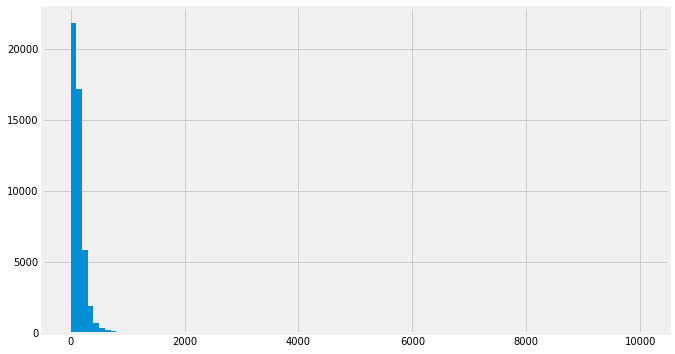

In [28]:
#A histogram plot can also be used to examine a given data for outliers 
#As can be observed from the plot below, most of the data are within 0 to 5000 range
plt.figure(figsize=(10, 6))
airbnb_df['price'].hist(bins=100)

A boxplot can also be used to detect outliers in a data.
As can be ovserved in the plot below, the price column posses multiple data points that can be termed outliers (data points that are above the maximum values in the box).

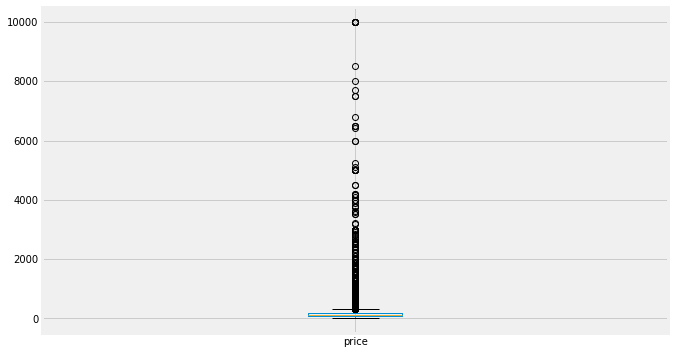

In [29]:
plt.figure(figsize=(10, 6))
airbnb_df.boxplot(column=['price'])

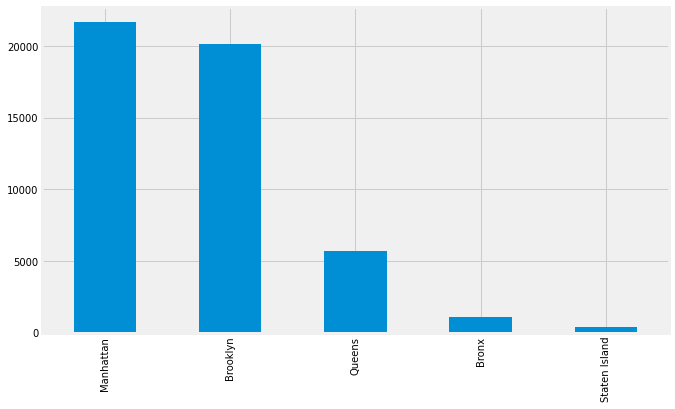

In [30]:
#observing the neighbourhood_group column for outliers using a bar plot
plt.figure(figsize=(10, 6))
airbnb_df['neighbourhood_group'].value_counts().plot.bar()

Statistical methods such as standard deviation and Interquartile range can be used to categorize numerical values as outliers 

# Conclusion
Documenting all data cleaning activities including the tools, functions and approaches used could assist others to understand the processes undertaken to obtain the final clean data and could form the organization's culture or process in tackling dirty data.

# References
https://elitedatascience.com/data-cleaning

https://www.tableau.com/learn/articles/what-is-data-cleaning